In [1]:
import numpy as np

In [2]:
x = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12]])
y = np.array([[1200],[2000],[3300],[4000],[5200],[6000],[6800],[7800],[9000],[9800],[11101],[12000]])

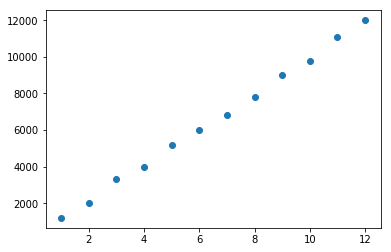

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x, y)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)

/opt/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
x

array([[-1.59325501],
       [-1.30357228],
       [-1.01388955],
       [-0.72420682],
       [-0.43452409],
       [-0.14484136],
       [ 0.14484136],
       [ 0.43452409],
       [ 0.72420682],
       [ 1.01388955],
       [ 1.30357228],
       [ 1.59325501]])

In [6]:
scalar_y = StandardScaler()
y = scalar_y.fit_transform(y)

/opt/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
y

array([[-1.57292819],
       [-1.33625305],
       [-0.95165594],
       [-0.7445652 ],
       [-0.38955249],
       [-0.15287735],
       [ 0.08379779],
       [ 0.37964172],
       [ 0.73465443],
       [ 0.97132957],
       [ 1.35622251],
       [ 1.6221862 ]])

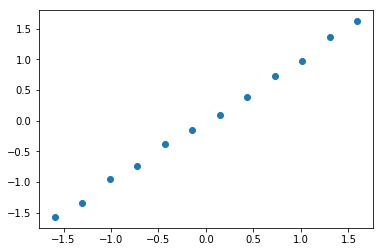

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x, y)

# y = ax+b

## Predição/Classificação = Peso * Entrada + Bias

In [9]:
import tensorflow as tf
from random import random

valor_a = random()
valor_b = random()

print('valor_a: {}'.format(valor_a))
print('valor_b: {}'.format(valor_b))

a = tf.Variable(valor_a) #peso
b = tf.Variable(valor_b) #bias


valor_a: 0.7797766469940081
valor_b: 0.6463986839702727


In [10]:
erro = tf.losses.mean_squared_error(y, (a*x+b))
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

In [11]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(treinamento)
    a_output,b_output = sess.run([a,b])

In [12]:
print(a_output)
print(b_output)

0.9695306
0.08730564


In [13]:
previsoes = a_output*x+b_output
previsoes

array([[-1.45740382],
       [-1.17654755],
       [-0.89569129],
       [-0.61483502],
       [-0.33397876],
       [-0.05312249],
       [ 0.22773378],
       [ 0.50859004],
       [ 0.78944631],
       [ 1.07030257],
       [ 1.35115884],
       [ 1.6320151 ]])

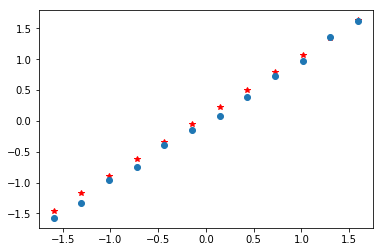

In [14]:
plt.plot(x, previsoes, '*', color='red')
plt.plot(x, y, 'o')

In [15]:
previsao = a_output * scaler_x.transform([[13]]) + b_output
resultado = scalar_y.inverse_transform(previsao)
resultado

array([[12982.56257976]])

In [16]:
from sklearn.metrics import mean_absolute_error

y1 = scalar_y.inverse_transform(y)
p1 = scalar_y.inverse_transform(previsoes)
mae = mean_absolute_error(y1, p1)

In [17]:
print(mae)

297.9597715879998
